# Atividades

## Analisando dados de ocorrências de feminicídio na cidade de São Paulo

Algumas perguntas com relação ao dataset podem ser respondidas
- Como os índices de feminicídio evoluíram em relação ao tempo e como podem evoluir nos próximos anos?
- Quais foram os períodos com maiores taxas nos últimos anos?
- Quais são os logradouros, tipos de locais, bairros e regiões com maiores índices?
- Quais são os dias da semana, horários com maiores índices?

Dataset disponível em: http://www.ssp.sp.gov.br/transparenciassp/Default.aspx

#### Bárbara Stéphanie Neves - 388713

## Imports Necessários

In [1]:
import os
import pandas as pd
import numpy as np

import calendar
from time import strptime

import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

## Leitura dos Dados 

### Lendo os Arquivos do Dataset

In [2]:
data = []
path = "./Dataset/"

for file in os.listdir(path=path) :
    data.append(pd.read_excel(path + file))

### Concatenando os Dataframes

In [3]:
df_concat = pd.concat(data, axis=0, ignore_index=True, sort=False)

print('O dataset de dados possui ' + str((df_concat.shape[0])) + ' instâncias e ' 
      + str((df_concat.shape[1])) + ' atributos')

df_concat.head()

O dataset de dados possui 455 instâncias e 56 atributos


,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2018,3608,3608/2018,01/11/2018 20:16:28,01/11/2018 21:29:35,01/11/2018,A TARDE,01/11/2018,01/11/2018 20:16:28,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
1,2018,3608,3608/2018,01/11/2018 20:16:28,01/11/2018 21:29:35,01/11/2018,A TARDE,01/11/2018,01/11/2018 20:16:28,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
2,2018,9548,9548/2018,02/11/2018 23:42:07,03/11/2018 04:10:23,02/11/2018,A NOITE,02/11/2018,02/11/2018 23:42:07,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
3,2018,1290,1290/2018,06/11/2018 19:48:09,07/11/2018 12:16:05,06/11/2018,EM HORA INCERTA,06/11/2018,06/11/2018 19:48:09,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
4,2018,1290,1290/2018,06/11/2018 19:48:09,07/11/2018 12:16:05,06/11/2018,EM HORA INCERTA,06/11/2018,06/11/2018 19:48:09,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN


### Salvando o Dataframe em Arquivo - Versão 0

Caso seja necessário consultar/utilizar o dataset completo.

In [4]:
df_concat.to_csv('DadosBO_2018_2019_SP_Feminicidio_Versao0.csv', index = False)

## Pré-Processamento

In [5]:
df_concat.describe(include='all')

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
count,455.000000,455.000000,455,455,455,455,455,455,455,455,...,1,1,1,1,1,455.000000,455.000000,1,0.0,0.0
unique,NaN,NaN,215,216,216,170,5,169,216,3,...,1,1,1,1,1,NaN,NaN,1,NaN,NaN
top,NaN,NaN,1078/2019,19/04/2019 18:26:06,19/04/2019 21:32:11,03/10/2018,A TARDE,03/10/2018,19/04/2019 18:26:06,Conhecida,...,EEG0342,SP,CAMPINAS,Preta,HONDA/CG 160 FAN,NaN,NaN,MOTOCICLO,NaN,NaN
freq,NaN,NaN,7,7,7,9,130,9,7,397,...,1,1,1,1,1,NaN,NaN,1,NaN,NaN
mean,2018.373626,2629.213187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.437363,4.437363,NaN,NaN,NaN
std,0.484299,3676.736474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,94.652180,94.652180,NaN,NaN,NaN
min,2018.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,2018.000000,469.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
50%,2018.000000,1440.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
75%,2019.000000,3321.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN


In [6]:
df_concat.corr()

,ANO_BO,NUM_BO,NUMERO,LATITUDE,LONGITUDE,RG,IDADE,PARENTESCO,ANO_FABRICACAO,ANO_MODELO,QUANT_CELULAR,MARCA_CELULAR
ANO_BO,1.000000,-0.248549,-0.110380,0.029376,-0.096624,-0.072146,0.042624,NaN,0.060767,0.060767,NaN,NaN
NUM_BO,-0.248549,1.000000,0.000626,-0.069436,-0.161094,0.046839,-0.064436,NaN,-0.008961,-0.008961,NaN,NaN
NUMERO,-0.110380,0.000626,1.000000,0.033974,0.080661,0.089189,-0.051512,NaN,-0.001543,-0.001543,NaN,NaN
LATITUDE,0.029376,-0.069436,0.033974,1.000000,-0.601541,-0.009059,0.083429,NaN,-0.010885,-0.010885,NaN,NaN
LONGITUDE,-0.096624,-0.161094,0.080661,-0.601541,1.000000,-0.012225,-0.048884,NaN,0.012941,0.012941,NaN,NaN
RG,-0.072146,0.046839,0.089189,-0.009059,-0.012225,1.000000,-0.716866,NaN,NaN,NaN,NaN,NaN
IDADE,0.042624,-0.064436,-0.051512,0.083429,-0.048884,-0.716866,1.000000,NaN,NaN,NaN,NaN,NaN
PARENTESCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANO_FABRICACAO,0.060767,-0.008961,-0.001543,-0.010885,0.012941,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN
ANO_MODELO,0.060767,-0.008961,-0.001543,-0.010885,0.012941,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN


In [7]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 56 columns):
ANO_BO                      455 non-null int64
NUM_BO                      455 non-null int64
NUMERO_BOLETIM              455 non-null object
BO_INICIADO                 455 non-null object
BO_EMITIDO                  455 non-null object
DATAOCORRENCIA              455 non-null object
PERIDOOCORRENCIA            455 non-null object
DATACOMUNICACAO             455 non-null object
DATAELABORACAO              455 non-null object
BO_AUTORIA                  455 non-null object
FLAGRANTE                   455 non-null object
NUMERO_BOLETIM_PRINCIPAL    64 non-null object
LOGRADOURO                  135 non-null object
NUMERO                      453 non-null float64
BAIRRO                      453 non-null object
CIDADE                      453 non-null object
UF                          453 non-null object
LATITUDE                    135 non-null float64
LONGITUDE                   135 

### Removendo Dados Duplicados 

Primeiro verificamos se existem instâncias duplicatas no dataset:

In [7]:
dups = df_concat.duplicated()
print('Número de linhas duplicadas: ' + str((dups.sum())))

Número de linhas duplicadas: 0


### Padronizando as Strings

Transformando as strings para *lowercase*, deixando apenas a primeira letra maiúscula:

In [8]:
df_concat = df_concat.applymap(lambda s:s.lower().capitalize() if type(s) == str else s)
    
df_concat.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2018,3608,3608/2018,01/11/2018 20:16:28,01/11/2018 21:29:35,01/11/2018,A tarde,01/11/2018,01/11/2018 20:16:28,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
1,2018,3608,3608/2018,01/11/2018 20:16:28,01/11/2018 21:29:35,01/11/2018,A tarde,01/11/2018,01/11/2018 20:16:28,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
2,2018,9548,9548/2018,02/11/2018 23:42:07,03/11/2018 04:10:23,02/11/2018,A noite,02/11/2018,02/11/2018 23:42:07,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
3,2018,1290,1290/2018,06/11/2018 19:48:09,07/11/2018 12:16:05,06/11/2018,Em hora incerta,06/11/2018,06/11/2018 19:48:09,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
4,2018,1290,1290/2018,06/11/2018 19:48:09,07/11/2018 12:16:05,06/11/2018,Em hora incerta,06/11/2018,06/11/2018 19:48:09,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN


### Verificando os Valores Faltantes

Contagem dos valores não-nulos para verificar a quantidade de valores faltantes em cada coluna:

In [9]:
data2 = df_concat.replace('?', np.NaN)
count = 0
        
print('Nome da coluna e sua quantidade de valores faltantes:\n')

for col in data2.columns :
    value = data2[col].isna().sum() 
    if (value != 0) :
        print('\t%s = %d' % (col, data2[col].isna().sum()))
    if (value >= 300) :
        count += 1
    
        
print('\nQuantidade de colunas que possuem mais de 300 valores faltantes: ' + str(count))

Nome da coluna e sua quantidade de valores faltantes:

	NUMERO_BOLETIM_PRINCIPAL = 391
	LOGRADOURO = 320
	NUMERO = 2
	BAIRRO = 2
	CIDADE = 2
	UF = 2
	LATITUDE = 320
	LONGITUDE = 320
	EXAME = 44
	DESDOBRAMENTO = 119
	NOMEPESSOA = 53
	TIPOPESSOA = 53
	VITIMAFATAL = 53
	RG = 66
	RG_UF = 64
	NATURALIDADE = 61
	NACIONALIDADE = 84
	SEXO = 57
	DATANASCIMENTO = 63
	IDADE = 61
	ESTADOCIVIL = 87
	PROFISSAO = 167
	GRAUINSTRUCAO = 285
	CORCUTIS = 53
	NATUREZAVINCULADA = 53
	TIPOVINCULO = 53
	RELACIONAMENTO = 270
	PARENTESCO = 455
	PLACA_VEICULO = 454
	UF_VEICULO = 454
	CIDADE_VEICULO = 454
	DESCR_COR_VEICULO = 454
	DESCR_MARCA_VEICULO = 454
	DESCR_TIPO_VEICULO = 454
	QUANT_CELULAR = 455
	MARCA_CELULAR = 455

Quantidade de colunas que possuem mais de 300 valores faltantes: 13


**DISCUSSÕES**

Com base nos valores dados anteriormente, percebemos que os atributos 
1. **NUMERO_BOLETIM_PRINCIPAL**
* **LOGRADOURO**
* **LATIDUDE**
* **LONGITUDE**
* **PARENTESCO**
* **PLACA_VEICULO**
* **UF_VEICULO**
* **CIDADE_VEICULO**
* **DESCR_COR_VEICULO**
* **DESCR_MARCA_VEICULO**
* **DESCR_TIPO_VEICULO**
* **QUANT_CELULAR**
* **MARCA_CELULAR**

possuem mais de 300 valores faltantes e quase todas eles se tornam desnecessários, pois não são relevantes para uma futura análise. 

- **NUMERO_BOLETIM_PRINCIPAL** não se torna relevante, pois, além de possuir 391 valores faltantes, este atributo é a junção de **NUMERO_BOLETIM** e mais um valor aleatório. Um detalhe que podemos perceber é que justamente essa coluna **NUMERO_BOLETIM**, já é junção de outras duas: **ANO_BO** e **NUM_BO**. O que também a torna desnecessária para nossa análise. 
- Outros atributos deste conjunto que poderiam ser relevantes são **LOGRADOURO** e **PARENTESCO**. Podemos obter alguma informação através deste último, como saber se as mulheres que sofreram feminicídio ou tentativa possuem relações familiares com seus assassinos, mas, esta coluna possui 455 valores faltantes, ou seja, está vazia de informações. Sem contar que podemos analisar se existe uma relação familiar entre vítima e assassino através da coluna **RELACIONAMENTO**. 
- Iremos desconsiderar também os atributos relacionados a veículos, pois temos informação apenas de uma pessoa.
- Também não consideraremos valores pessoais, como os contidos em **RG** e **RG_UF**, nem **UF**, já que sabemos que os BOs são do estado de São Paulo.

### Agregação

Como visto anteriormente, não existem linhas duplicadas, mas, ao analisar o dataset, percebe-se que alguns textos dos BOs estão "quebrados". 
Ou seja, temos várias instâncias com um mesmo número de BO, que possuem praticamente o mesmo conteúdo, mas que quase sempre se separam nas colunas
- **ESPECIE**, 
- **RUBRICA**, 
- **DESDOBRAMENTO**, e 
- **NATUREZAVINCULADA**.

O código abaixo mostra a quantidade de linhas que existe para um mesmo BO e as informações das colunas **NUM_BO**, **DATAOCORRENCIA**, **ESPECIE**, **RUBRICA**, **DESDOBRAMENTO**, **NOMEPESSOA** e **NATUREZAVINCULADA**, para termos uma noção dos valores "quebrados". 

In [ ]:
uniques = df_concat['NUM_BO'].unique()

df = []

for unique in uniques:
    data3 = df_concat[df_concat.NUM_BO == unique]
    df.append(data3)

for data3 in df:
    #columns = data3.columns.tolist()
    #Exclui as últimas 11 colunas
        #data3 = data3[columns[:len(columns)-11]]
    print(data3[['NUM_BO', 'DATAOCORRENCIA', 'ESPECIE', 'RUBRICA', 'DESDOBRAMENTO', 'NOMEPESSOA',
                 'NATUREZAVINCULADA']])
    print('\n')
    
# Verifica os valores para um único número de BO
    #is_4432 = df_concat['NUM_BO'] == 4432
    #df_4432 = df_concat[is_4432]
    #df_4432[['NUM_BO', 'ESPECIE', 'RUBRICA', 'DESDOBRAMENTO', 'NATUREZAVINCULADA']]

Dessa forma, os dados serão agrupados e agregados por **NUM_BO** e não consideraremos as colunas analisadas em **Verificando os Valores Faltantes**. 

Assim, formaremos um novo dataframe apenas com:

In [10]:
funcoesAgg = {'ANO_BO' : 'first', 'BO_INICIADO' : 'first', 'BO_EMITIDO' : 'first', 'DATAOCORRENCIA' : 'first',
              'PERIDOOCORRENCIA': 'first', 'DATACOMUNICACAO' : 'last', 'DATAELABORACAO' : 'first', 
              'BO_AUTORIA' : 'first', 'FLAGRANTE' : 'first','LOGRADOURO' : 'first', 'NUMERO' : 'first', 
              'BAIRRO' : 'first', 'CIDADE' : 'first', 'DESCRICAOLOCAL' : 'first', 'EXAME' : 'first', 
              'SOLUCAO' : 'first', 'DELEGACIA_NOME' : 'first', 'DELEGACIA_CIRCUNSCRICAO' : 'first', 
              'ESPECIE' : 'last', 'RUBRICA' : 'last', 'DESDOBRAMENTO' : 'last', 'STATUS' : 'last', 
              'NOMEPESSOA' : 'last', 'TIPOPESSOA' : 'last', 'VITIMAFATAL' : 'last', 'NATURALIDADE' : 'last', 
              'NACIONALIDADE' : 'last', 'SEXO' : 'last', 'DATANASCIMENTO' : 'last', 'IDADE' : 'last', 
              'ESTADOCIVIL' : 'last', 'PROFISSAO' : 'last', 'GRAUINSTRUCAO' : 'last', 'CORCUTIS' : 'last', 
              'NATUREZAVINCULADA' : 'last', 'TIPOVINCULO' : 'last', 'RELACIONAMENTO' : 'last'}

df_novo = df_concat.groupby(df_concat['NUM_BO']).agg(funcoesAgg)

df_novo.head()

,ANO_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,...,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO
NUM_BO,,,,,,,,,,,,,,,,,,,,,
12,2018,13/03/2018 17:26:13,13/03/2018 19:50:39,13/03/2018,A tarde,13/03/2018,13/03/2018 17:26:13,Conhecida,Não,Avenida av. dep. luis eduardo magalhães,...,Feminino,1993-10-07,24.0,Solteiro,Nao informada,NaN,Branca,"Homicídio qualificado (art. 121, §2o.)",Vítima,NaN
13,2019,08/06/2019 15:48:33,08/06/2019 18:46:30,06/06/2019,A noite,08/06/2019,08/06/2019 15:48:33,Conhecida,Não,NaN,...,Feminino,1944-11-09,74.0,Casado,Pensionista,1 grau incompleto,Parda,"Destruição, subtração ou ocultação de cadáver ...",Vítima,Casamento
15,2019,19/01/2019 13:28:56,19/01/2019 17:21:12,19/01/2019,Pela manhã,19/01/2019,19/01/2019 13:28:56,Conhecida,Sim,NaN,...,Masculino,1977-01-13,42.0,Solteiro,Autonomo(a),1 grau incompleto,Parda,"Homicídio qualificado (art. 121, §2o.)",Vítima,NaN
24,2019,09/02/2019 07:51:28,09/02/2019 11:16:54,09/02/2019,Pela manhã,09/02/2019,09/02/2019 07:51:28,Conhecida,Sim,NaN,...,Feminino,1958-03-21,60.0,Casado,Prendas domesticas,NaN,Branca,"Homicídio qualificado (art. 121, §2o.)",Vítima,Casamento
25,2019,03/01/2019 12:17:20,03/01/2019 19:05:46,03/01/2019,De madrugada,03/01/2019,03/01/2019 12:17:20,Conhecida,Sim,Rua ângelo scarpato,...,Feminino,1979-11-17,39.0,Ignorado,NaN,NaN,Branca,"Homicídio qualificado (art. 121, §2o.)",Vítima,NaN


### Transformando Dados Temporais no Tipo Apropriado

Alterando tipos dos dados referentes a data para *datetime*:

In [11]:
# Data e horário em que o BO foi iniciado
df_novo['BO_INICIADO'] = pd.to_datetime(df_novo['BO_INICIADO']) 
# Data e horário em que o BO foi emitido
df_novo['BO_EMITIDO'] = pd.to_datetime(df_novo['BO_EMITIDO'])
# Data da ocorrência (do assassinato)
df_novo['DATAOCORRENCIA'] = pd.to_datetime(df_novo['DATAOCORRENCIA'])
# Data em que o BO foi feito 
df_novo['DATACOMUNICACAO'] = pd.to_datetime(df_novo['DATACOMUNICACAO'])
# Data em que o BO foi elaborado (igual a BO_INICIADO)
df_novo['DATAELABORACAO'] = pd.to_datetime(df_novo['DATAELABORACAO'])
# Data de nascimento da vítima
df_novo['DATANASCIMENTO'] = pd.to_datetime(df_novo['DATANASCIMENTO'])

# Tirando a data das colunas BO_EMITIDO e BO_INICIADO já que estão  
    # em DATACOMUNICACAO, e a data e hora em DATAELABORACAO
df_novo['BO_INICIADO'] = df_novo['BO_INICIADO'].dt.strftime('%H:%M:%S')
df_novo['BO_EMITIDO'] = df_novo['BO_EMITIDO'].dt.strftime('%H:%M:%S')

# Transformando DATAOCORRENCIA em duas novas colunas apenas com dia e mês
df_novo['DIA_OCORRENCIA'] = df_novo['DATAOCORRENCIA'].dt.strftime('%d')
df_novo['MES_OCORRENCIA'] = df_novo['DATAOCORRENCIA'].dt.strftime('%m')

# Mudando os meses de MES_OCORRENCIA que estão em números para seus respectivos nomes
df_novo['MES_OCORRENCIA'] = df_novo['MES_OCORRENCIA'].apply(lambda x: strptime(x, '%m').tm_mon) 
df_novo['MES_OCORRENCIA'] = df_novo['MES_OCORRENCIA'].apply(lambda x: calendar.month_abbr[x])

# Transformando DATACOMUNICACAO em duas novas colunas apenas com dia e mês
df_novo['DIA_COMUNICACAO'] = df_novo['DATACOMUNICACAO'].dt.strftime('%d')
df_novo['MES_COMUNICACAO'] = df_novo['DATACOMUNICACAO'].dt.strftime('%m')
del df_novo['DATACOMUNICACAO']

# Mudando os meses de MES_COMUNICACAO que estão em números para seus respectivos nomes
df_novo['MES_COMUNICACAO'] = df_novo['MES_COMUNICACAO'].apply(lambda x: strptime(x, '%m').tm_mon) 
df_novo['MES_COMUNICACAO'] = df_novo['MES_COMUNICACAO'].apply(lambda x: calendar.month_abbr[x])

### Verificando o Novo Dataframe

In [12]:
print('O dataset de dados possui ' + str((df_novo.shape[0])) + ' instâncias e ' 
      + str((df_novo.shape[1])) + ' atributos')

df_novo.head()

O dataset de dados possui 211 instâncias e 40 atributos


,ANO_BO,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,NUMERO,...,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO,DIA_OCORRENCIA,MES_OCORRENCIA,DIA_COMUNICACAO,MES_COMUNICACAO
NUM_BO,,,,,,,,,,,,,,,,,,,,,
12,2018,17:26:13,19:50:39,2018-03-13,A tarde,2018-03-13 17:26:13,Conhecida,Não,Avenida av. dep. luis eduardo magalhães,2605.0,...,Nao informada,NaN,Branca,"Homicídio qualificado (art. 121, §2o.)",Vítima,NaN,13,Mar,13,Mar
13,2019,15:48:33,18:46:30,2019-06-06,A noite,2019-08-06 15:48:33,Conhecida,Não,NaN,0.0,...,Pensionista,1 grau incompleto,Parda,"Destruição, subtração ou ocultação de cadáver ...",Vítima,Casamento,06,Jun,06,Aug
15,2019,13:28:56,17:21:12,2019-01-19,Pela manhã,2019-01-19 13:28:56,Conhecida,Sim,NaN,0.0,...,Autonomo(a),1 grau incompleto,Parda,"Homicídio qualificado (art. 121, §2o.)",Vítima,NaN,19,Jan,19,Jan
24,2019,07:51:28,11:16:54,2019-09-02,Pela manhã,2019-09-02 07:51:28,Conhecida,Sim,NaN,0.0,...,Prendas domesticas,NaN,Branca,"Homicídio qualificado (art. 121, §2o.)",Vítima,Casamento,02,Sep,02,Sep
25,2019,12:17:20,19:05:46,2019-03-01,De madrugada,2019-03-01 12:17:20,Conhecida,Sim,Rua ângelo scarpato,1.0,...,NaN,NaN,Branca,"Homicídio qualificado (art. 121, §2o.)",Vítima,NaN,01,Mar,01,Mar


### Salvando o Novo Dataframe em Arquivo - Versão 1

In [13]:
df_novo.to_csv('DadosBO_2018_2019_SP_Feminicidio_Versao1.csv', index = False)

## Análise Exploratória

Análise comparativa do período de Janeiro a Dezembro de 2018 e Janeiro a Junho de 2019.

### Evolução dos Índices de Femínicio em Relação ao Tempo

#### Ano 

Lembrando que só temos os valores das taxas de feminicídio de 2019 até o mês de Junho, podemos constatar que o gráfico abaixo mostra que as taxas de feminicídio de 2019 já passaram da metade das que ocorreram em 2018.

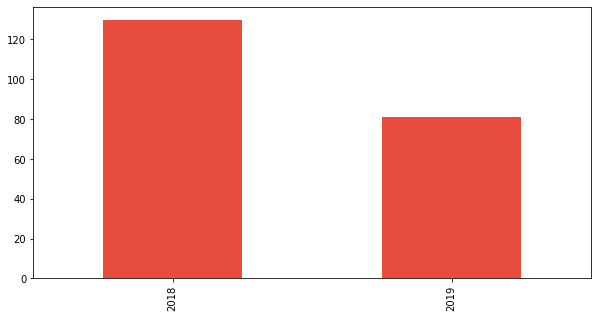

In [16]:
df_novo['ANO_BO'].value_counts().plot(kind='bar', figsize=(10,5), color='#e74c3c')

plt.show()

#### Períodos

In [561]:
trace1 = go.Bar(x = df_novo['PERIDOOCORRENCIA'],
                y = df_novo[df_novo['ANO_BO'] == 2018].groupby('PERIDOOCORRENCIA').size().sort_values(ascending=False),
                name = '2018',
                marker = {'color': '#d35400'})
trace2 = go.Bar(x = df_novo['PERIDOOCORRENCIA'],
                y = df_novo[df_novo['ANO_BO'] == 2019].groupby('PERIDOOCORRENCIA').size().sort_values(ascending=False),
                name = '2019',
                marker = {'color': '#f39c12'})

df = [trace1, trace2]

py.iplot(df)

Segundo o gráfico acima, concluímos que:
1. em **2018**, os crimes de feminicídio ocorreram na sua maior parte no período da manhã, e
* em **2019**, estes crimes ocorreram em sua maior parte também no período da manhã.

#### Meses

Analisando o gráfico, vemos que há uma maior incidência de mortes no mês de Janeiro.

In [576]:
trace1 = go.Scatter(x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                    y = df_novo[df_novo['ANO_BO'] == 2018].groupby('MES_OCORRENCIA').size().sort_values(
                        ascending=False),
                    mode = 'lines',
                    name = '2018',
                    line = {'color': '#ee5253',
                            'dash': 'dash'})

trace2 = go.Scatter(x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
                    y = df_novo[df_novo['ANO_BO'] == 2019].groupby('MES_OCORRENCIA').size().sort_values(
                        ascending=False),
                    mode = 'lines',
                    name = '2019',
                    line = {'color': '#341f97',
                            'dash': 'dot'})
df = [trace1, trace2]

py.iplot(df)

#### Dias

In [577]:
trace1 = go.Bar(x = df_novo['DIA_OCORRENCIA'],
                y = df_novo[df_novo['ANO_BO'] == 2018].groupby('DIA_OCORRENCIA').size().sort_values(ascending=False),
                name = '2018')
trace2 = go.Bar(x = df_novo['DIA_OCORRENCIA'],
                y = df_novo[df_novo['ANO_BO'] == 2019].groupby('DIA_OCORRENCIA').size().sort_values(ascending=False),
                name = '2019')

df = [trace1, trace2]

py.iplot(df)

Os dias que possuem maior taxa de ocorrência do crime são:

1. Em 2018:
    - Dia 01.
    - Dia 26.
    - Dia 4.
    

* Em 2019:
    - Dia 01.
    - Dia 26.
    - Dias 02, 06, 13 e 19.

### Locais com Maiores Taxas de Feminicídio

#### Cidades

O gráfico abaixo mostra que a **cidade de Campinas** é o local onde possui as maiores taxas de feminicídio.

In [544]:
trace1 = go.Bar(x = df_novo['CIDADE'],
                y = df_novo[df_novo['ANO_BO'] == 2018].groupby('CIDADE').size().sort_values(ascending=False),
                name = '2018',
                marker = {'color': '#d35400'})
trace2 = go.Bar(x = df_novo['CIDADE'],
                y = df_novo[df_novo['ANO_BO'] == 2019].groupby('CIDADE').size().sort_values(ascending=False),
                name = '2019',
                marker = {'color': '#f39c12'})

df = [trace1, trace2]

py.iplot(df)

#### Bairros

In [547]:
trace1 = go.Bar(x = df_novo['BAIRRO'],
                y = df_novo[df_novo['ANO_BO'] == 2018].groupby('BAIRRO').size().sort_values(ascending=False),
                name = '2018',
                marker = {'color': '#e74c3c'})
trace2 = go.Bar(x = df_novo['BAIRRO'],
                y = df_novo[df_novo['ANO_BO'] == 2019].groupby('BAIRRO').size().sort_values(ascending=False),
                name = '2019',
                marker = {'color': '#e67e22'})

df = [trace1, trace2]

py.iplot(df)

Os crimes ocorrem mais na Zona Rural e também no Parque Valença, da cidade de Campinas.

#### Logradouros

In [545]:
trace1 = go.Bar(x = df_novo['LOGRADOURO'],
                y = df_novo[df_novo['ANO_BO'] == 2018].groupby('LOGRADOURO').size().sort_values(ascending=False),
                name = '2018')
trace2 = go.Bar(x = df_novo['LOGRADOURO'],
                y = df_novo[df_novo['ANO_BO'] == 2019].groupby('LOGRADOURO').size().sort_values(ascending=False),
                name = '2019')

df = [trace1, trace2]

py.iplot(df)

#### Local

O local onde há mais ocorrências de feminicídio são nas residências das próprias vítimas.

In [699]:
trace1 = go.Bar(x = df_novo['DESCRICAOLOCAL'],
                y = df_novo[df_novo['ANO_BO'] == 2018].groupby('BAIRRO').size().sort_values(ascending=False),
                name = '2018',
                marker = {'color': '#e74c3c'})
trace2 = go.Bar(x = df_novo['DESCRICAOLOCAL'],
                y = df_novo[df_novo['ANO_BO'] == 2019].groupby('BAIRRO').size().sort_values(ascending=False),
                name = '2019',
                marker = {'color': '#e67e22'})

df = [trace1, trace2]

py.iplot(df)

### Delegacias Mais Procuradas

Com base no gráfico abaixo, a delegacia mais procurada do estado de São Paulo é a **Delegacia do 1° Distrito Policial de Campinas**.

In [586]:
trace1 = go.Bar(x = df_novo['DELEGACIA_NOME'],
                y = df_novo[df_novo['ANO_BO'] == 2018].groupby('BAIRRO').size().sort_values(ascending=False),
                name = '2018')
trace2 = go.Bar(x = df_novo['DELEGACIA_NOME'],
                y = df_novo[df_novo['ANO_BO'] == 2019].groupby('BAIRRO').size().sort_values(ascending=False),
                name = '2019')

df = [trace1, trace2]

py.iplot(df)

### Sobre o Crime

#### Status

In [589]:
trace1 = go.Bar(x = df_novo['STATUS'],
                y = df_novo[df_novo['ANO_BO'] == 2018].groupby('BAIRRO').size().sort_values(ascending=False),
                name = '2018',
                marker = {'color': '#e74c3c'})
trace2 = go.Bar(x = df_novo['STATUS'],
                y = df_novo[df_novo['ANO_BO'] == 2019].groupby('BAIRRO').size().sort_values(ascending=False),
                name = '2019',
                marker = {'color': '#e67e22'})

df = [trace1, trace2]

py.iplot(df)

### Sobre as Vítimas

#### Idade

As idades das vítimas variam de 20 a 40 anos.

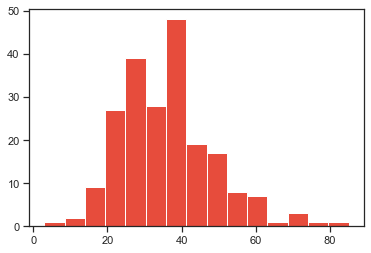

In [670]:
df_novo['IDADE'].fillna(df_novo['IDADE'].mean(), inplace=True)

hist = plt.hist(df_novo['IDADE'], bins=15, color='#e74c3c')

plt.show()

#### Estado Civil

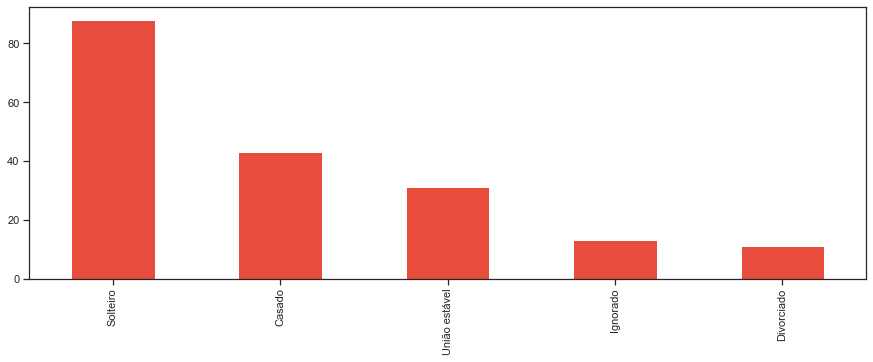

In [686]:
df_novo['ESTADOCIVIL'].value_counts().plot(kind='bar', figsize=(15,5), color='#e74c3c')

plt.show()

#### Relacionamento com o Assassino

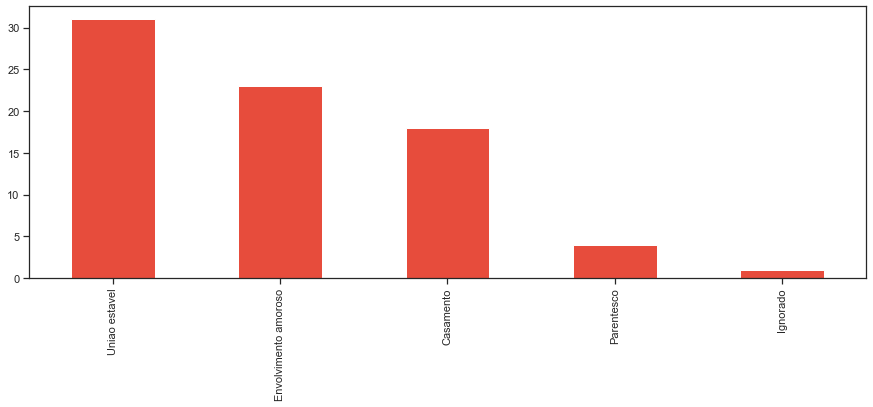

In [687]:
df_novo['RELACIONAMENTO'].value_counts().plot(kind='bar', figsize=(15,5), color='#e74c3c')

plt.show()

Com base nos dois gráficos anteriores, podemos concluir que as vítimas, em sua maioria, são solteiras e possuem apenas uma união estável com o agressor.

#### Cor da Pele

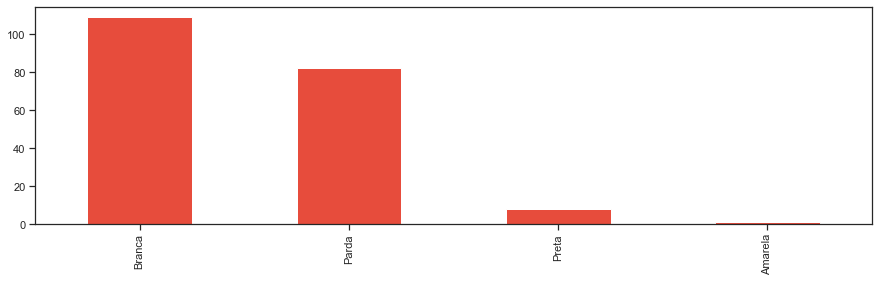

In [683]:
df_novo['CORCUTIS'].value_counts().plot(kind='bar', figsize=(15,4), color='#e74c3c')

plt.show()

#### Grau de Instrução

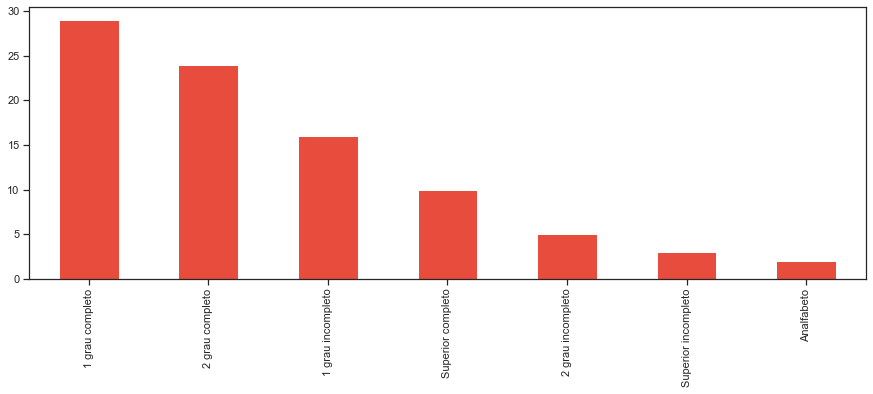

In [689]:
df_novo['GRAUINSTRUCAO'].value_counts().plot(kind='bar', figsize=(15,5), color='#e74c3c')

plt.show()

#### Profissão

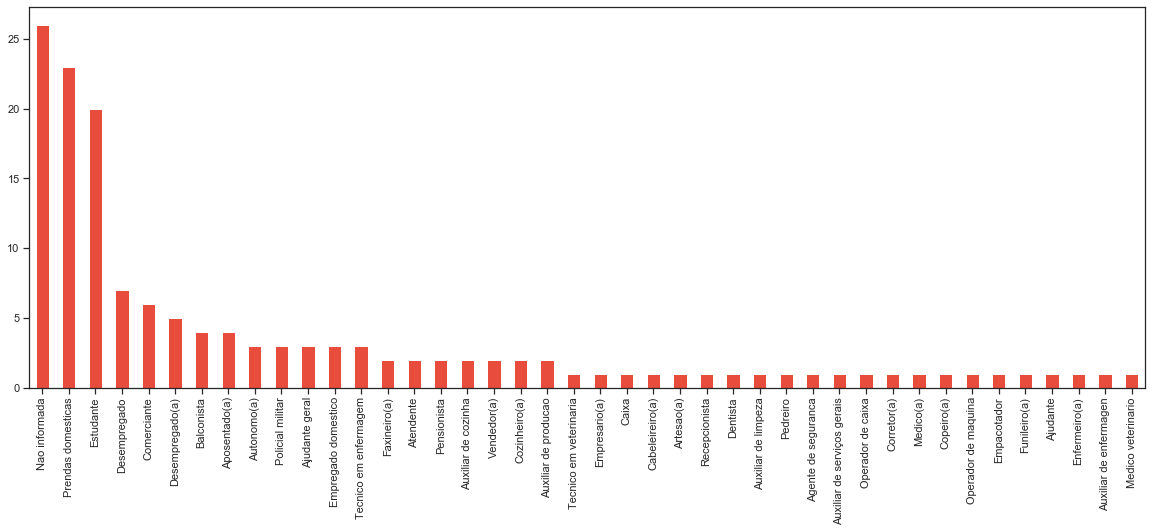

In [692]:
df_novo['PROFISSAO'].value_counts().plot(kind='bar', figsize=(20,7), color='#e74c3c')

plt.show()

#### Natureza da Morte

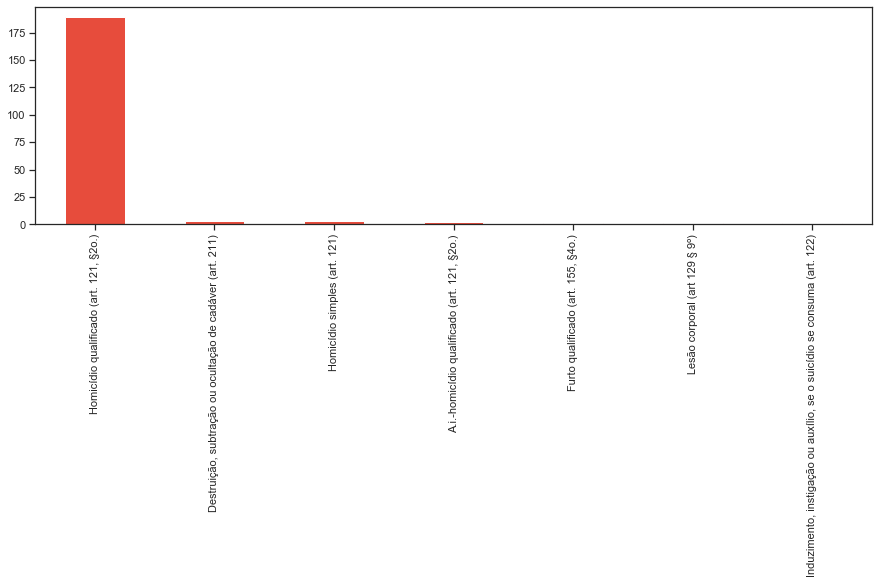

In [694]:
df_novo['NATUREZAVINCULADA'].value_counts().plot(kind='bar', figsize=(15,4), color='#e74c3c')

plt.show()

## Relatório

Com base na análise exploratória feita, podemos concluir que as taxas de feminicídio de 2019 do estado de São Paulo já passaram da metade das que ocorreram em 2018. A cidade onde ocorre a maioria dos crimes é em Campinas, tendo uma maior incidência nos bairros Parque Valênça (de Campinas), e na Zona Rural. A delegacia mais procurada é a Delegacia do 1° Distrito Policial de Campinas com quase todas as ocorrências contendo o *status* de crime consumado.

As vítimas possuem de 20 a 40 anos, solteiras, tendo apenas uma união estável com o assassino. Boa parte delas possuem a cor da pele branca, seguido de cor parda e preta. Quase 30% das vítimas tem apenas o 1ª Grau Completo e cerca de 22% são domésticas e estudantes. 

O mês de Janeiro é o que possui mais de 16% das ocorrências, sendo a maioria delas feitas no período da manhã, vindo em seguida do período da tarde, da noite e, por último, de madrugada, quase sempre nas próprias residências das vítimas.